In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

index=["sepal length ",
"sepal width ",
"petal length", 
"petal width",
"class"]

df=pd.read_csv(r"D:\GeakMinds Internship\real world projects\datasets\iris\iris.data",names=index)

In [2]:
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.shape

(150, 5)

In [4]:
df.isnull().sum()

sepal length     0
sepal width      0
petal length     0
petal width      0
class            0
dtype: int64

array([[<Axes: title={'center': 'sepal length '}>,
        <Axes: title={'center': 'sepal width '}>],
       [<Axes: title={'center': 'petal length'}>,
        <Axes: title={'center': 'petal width'}>]], dtype=object)

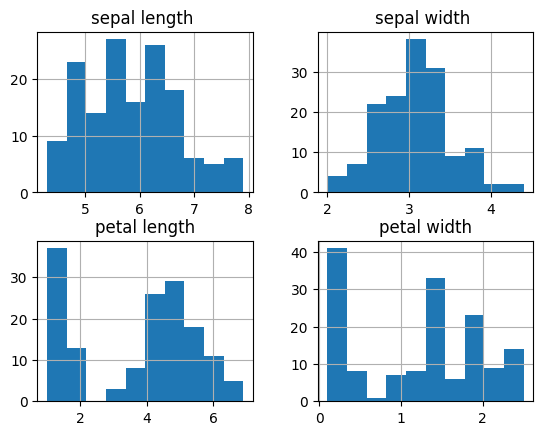

In [5]:
df.hist()

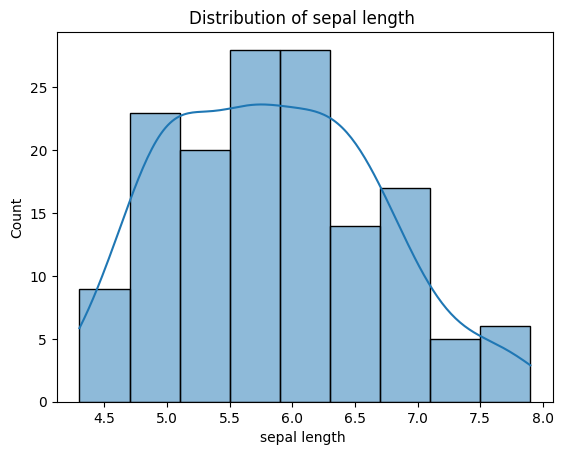

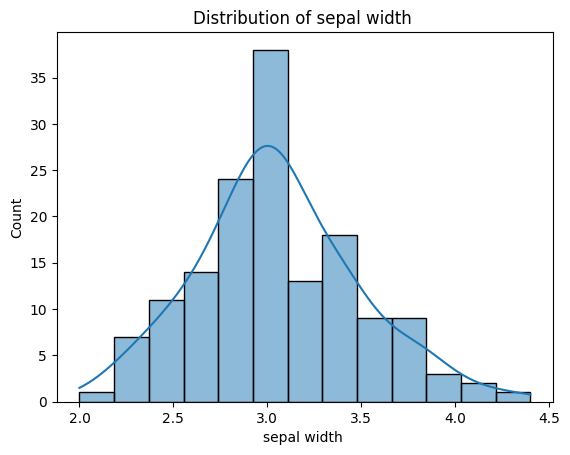

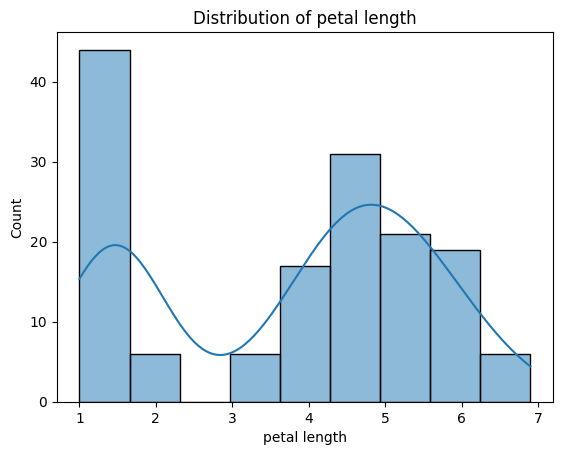

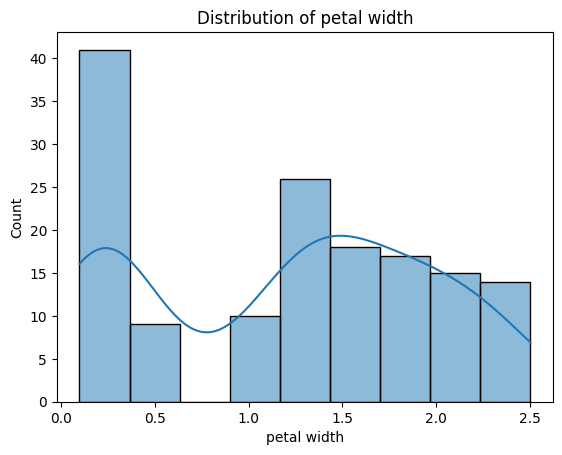

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = df.select_dtypes(include='number')

for col in numeric_cols.columns:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


In [14]:
skewness = df[numeric_cols.columns].skew()
print(skewness.sort_values())

petal length    -0.274464
petal width     -0.104997
sepal length     0.314911
sepal width      0.334053
dtype: float64


-0.5 to +0.5	Approx. symmetric (normal-like)	No transformation

< -1 or > +1	Highly skewed	Transformation helpful

-1 to -0.5 or 0.5 to 1	Moderately skewed	Optional transformation

In [15]:
# so no transformation

# no scaling req since it is tree type

In [ ]:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
col = ['class']  
df[col] = le.fit_transform(df[col])

In [17]:
df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [19]:
labels=le.classes_
labels

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop(columns='class'),df['class'],test_size=0.2,random_state=42)

In [22]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)
clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [23]:
y_pred = clf.predict(x_test)

In [26]:
from sklearn.metrics import accuracy_score, classification_report


print("Accuracy:", accuracy_score(y_test, y_pred))


print(classification_report(y_test, y_pred, target_names=labels))


Accuracy: 1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [28]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4, 5, 6, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    cv=5,  # cross validation
    scoring='accuracy',
    n_jobs=-1,  # Use all CPU cores
    verbose=1
)

grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=1)

In [29]:
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Cross-Validation Score: 0.9583333333333334


In [31]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))

Test Accuracy: 1.0
